# Kmeans Clustering. 
### Classification Banknotes. Using variance and skewness.
___

#### First: Import data. 

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

*Import dataset with all data https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt. The real dataset with results of genuine and forged I will use only the two first column and drop  duplicated and null values*

In [6]:


file_to_read="data_full_banknote.txt"
df_full_banknote=pd.read_csv(file_to_read)
# delete duplicated there is not null values
df_full_banknote= df_full_banknote.drop_duplicates()
# put the headers
df_full_banknote.columns=["V1", "V2", "V3", "V4", "class"]
df_full_banknote.drop(["V3", "V4"],axis=1, inplace=True)
missing_data = df_full_banknote.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 
df_full_banknote.dtypes

V1
False    1347
Name: V1, dtype: int64

V2
False    1347
Name: V2, dtype: int64

class
False    1347
Name: class, dtype: int64



V1       float64
V2       float64
class      int64
dtype: object

#### for the purpose of applying KMeans by sklearn, I will use train_test_split function from from sklearn.model_selection, to slicing dataset and obtain training set and evaluation set, 80% for training.


In [7]:
df_train_Kmeans, df_test_kmeans = train_test_split(df_full_banknote, test_size = 0.20)
print("data to train kmeans: ", len(df_train_Kmeans))
print("data to test kmean: ", len(df_test_kmeans))

data to train kmeans:  1077
data to test kmean:  270


##### To scale dataset I use RobustScaler from sklearn because outliers, later need inverse_transform(X) to scale back the data to the original representation.

In [9]:
# Scale robust due to outliers in data
#from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(df_train_Kmeans)
np_train_scaled=transformer.transform(df_train_Kmeans)

#### First applications of kmeans algorithm
---
*To find the optimal number of clusters I will use two techniques Elbow and Silhouettes, both using yellowbrick.*
```python
pip install yellowbrick
```

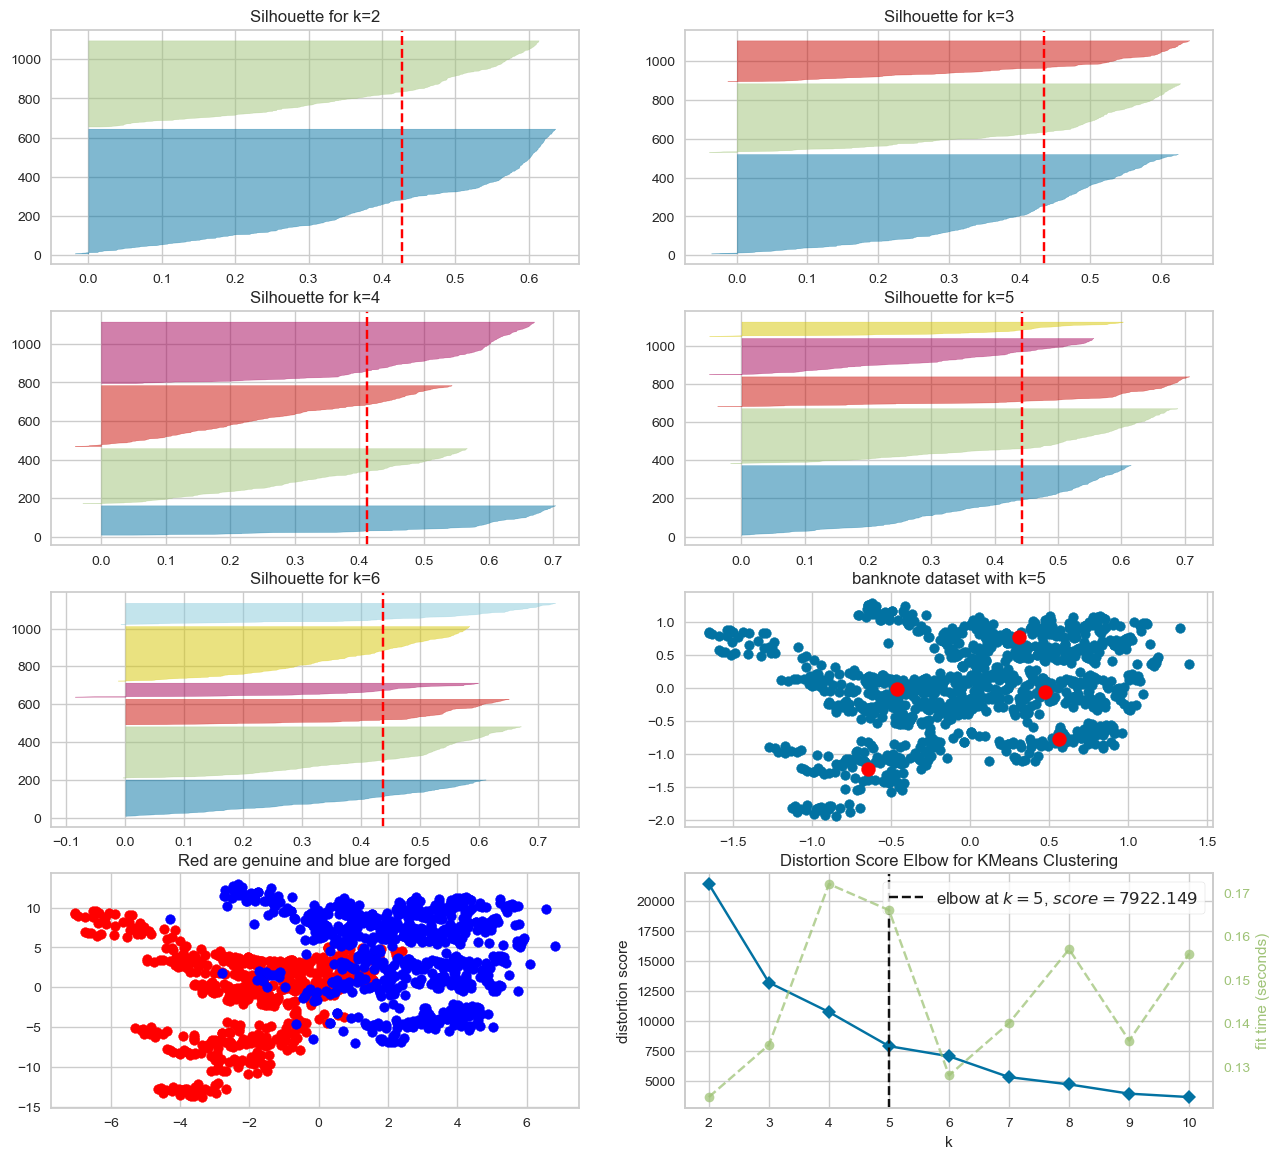

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
# create arrays  to plot scatter with genuine and forged
df_genuino=np.array(df_full_banknote[df_full_banknote["class"]==1])
df_false=np.array(df_full_banknote[df_full_banknote["class"]==0])
# 
X= df_train_Kmeans
  
fig, ax = plt.subplots(4, 2, figsize=(15,14))
for i in [2, 3, 4, 5, 6]:
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 
   
km = KMeans(random_state=42, n_init="auto")
visualizer = KElbowVisualizer(km)
visualizer.fit(X)  

kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(np_train_scaled)
clusters= kmeans.cluster_centers_
ax[2, 1].scatter(np_train_scaled[:,0], np_train_scaled[:,1])
ax[2, 1].scatter(clusters[:,0], clusters[:,1], s=100, color="red")

ax[0, 0].set_title("Silhouette for k=2")
ax[0, 1].set_title("Silhouette for k=3")
ax[1, 0].set_title("Silhouette for k=4")
ax[1, 1].set_title("Silhouette for k=5")
ax[2, 0].set_title("Silhouette for k=6")
ax[2, 1].set_title("banknote dataset with k=5")
ax[3, 0].set_title("Red are genuine and blue are forged")
ax[3, 1].set_title("Distortion score Elbow")

ax[3, 0].scatter(df_genuino[:,0], df_genuino[:,1], color="red")
ax[3, 0].scatter(df_false[:,0], df_false[:,1], color="blue")
visualizer.show()





In [57]:
X= df_train_Kmeans

for i in [2, 3, 4, 5, 6]:
    n_clusters=i
    km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=100, random_state=42)
    km.fit(X)
    label=km.fit_predict(X)
    centers = km.cluster_centers_

    score = silhouette_score(X, label)
    print ("For n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

For n_clusters =2 silhouette score is 0.42793295164540895
For n_clusters =3 silhouette score is 0.4346620550288489
For n_clusters =4 silhouette score is 0.4110337210157872
For n_clusters =5 silhouette score is 0.44250951279026096
For n_clusters =6 silhouette score is 0.4365379705533516


#### The following conditions must be verified to choose the correct 'K' using the silhouette diagrams:

 For a particular K, all groups must have a Silhouette score greater than the average score of the data set (represented by a red dotted line). The x-axis represents the Silhouette score. Clusters with K = 2 and 4 are removed because they do not meet this condition.
There should not be large fluctuations in the size of the clusters. The width of the groups represents the number of data points. The greatest value is 0.44250951279026096 for K = 5, it forms groups of uniform size and it was also the number that Elbow gave

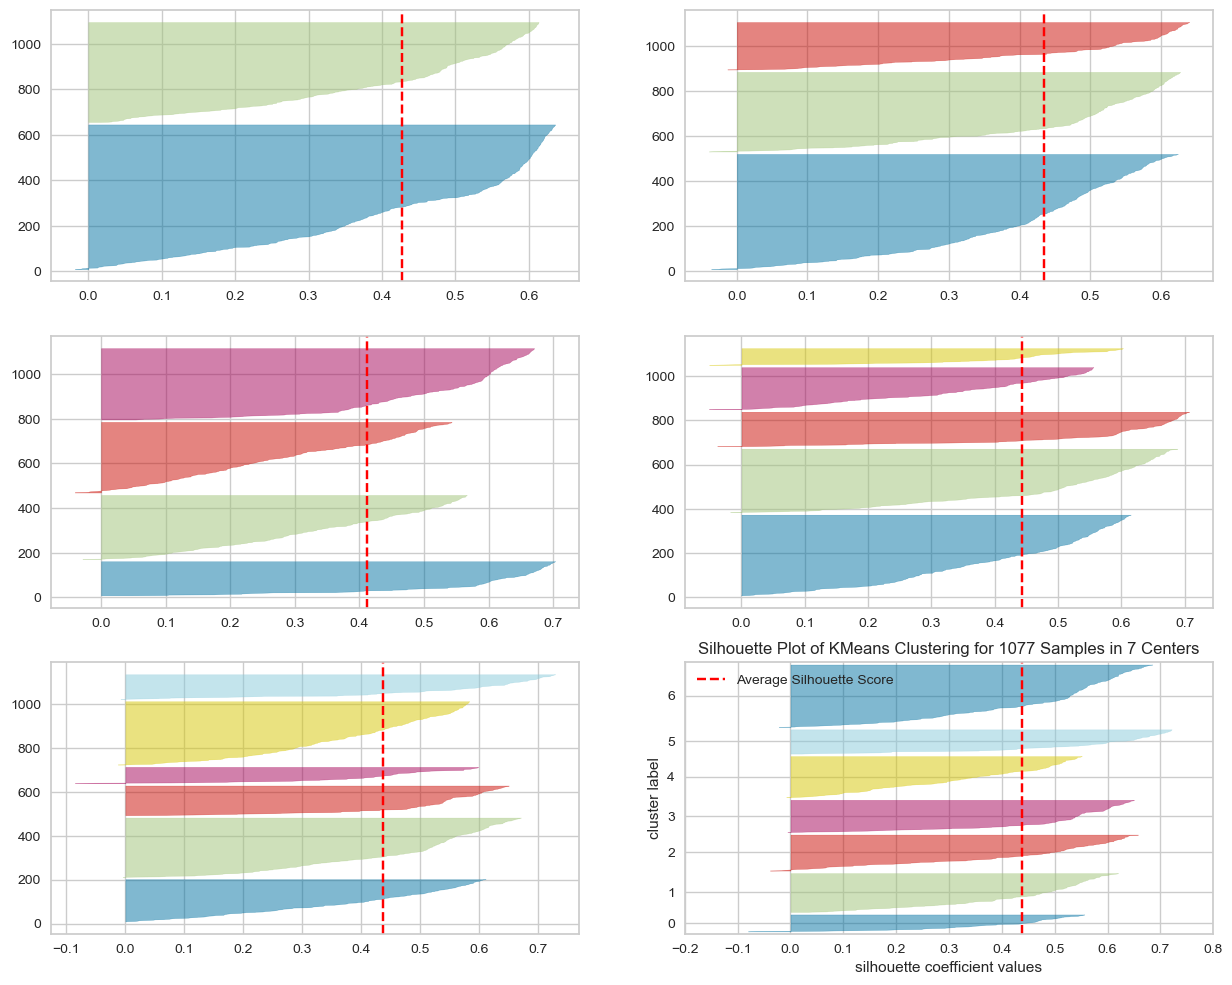

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1077 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [60]:
X= df_train_Kmeans
  
fig, ax = plt.subplots(3, 2, figsize=(15,12))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Crear instancias de KMeans para diferentes números de clústeres 
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Crear una instancia de SilhouetteVisualizer con una instancia de KMeans 
    Ajustar el visualizador 
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
  
    visualizer.fit(X) 



visualizer.show()   

#### Some studies use the Elbow method in unsupervised algorithm to choose the number of clusters to use in the model, the code below is taken from:  https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
distortion: average of squared distances from the cluster center using Euclidean metric

inertia: sum of the squared distances of samples to their closest cluster center
 

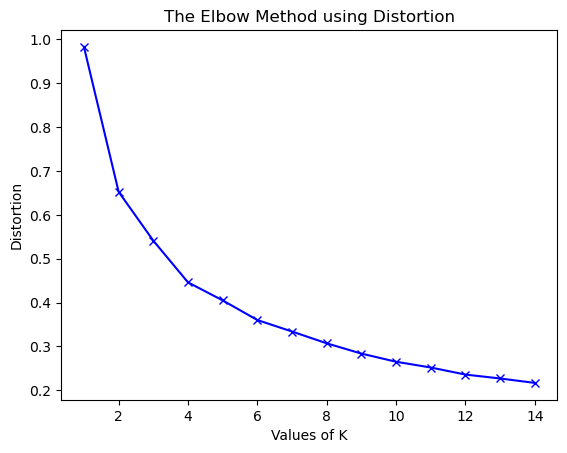

In [20]:
# from https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
from sklearn import metrics
from scipy.spatial.distance import cdist
X=np_train_scaled
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()



#### plot genuine and forged distribution

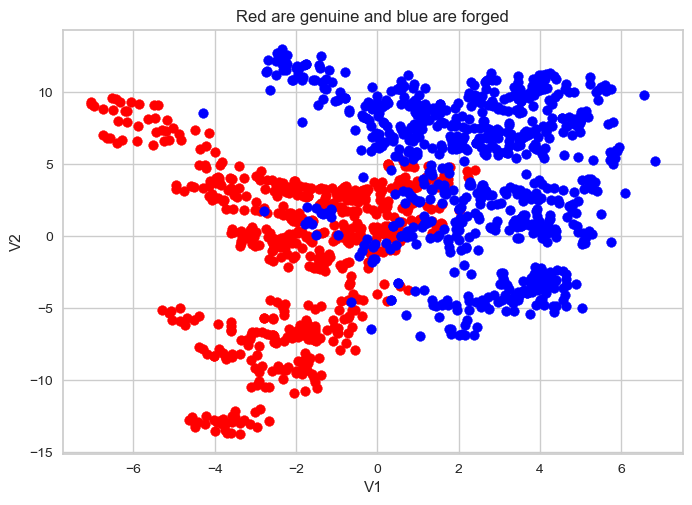

In [24]:

df_genuino=np.array(df_full_banknote[df_full_banknote["class"]==1])
df_false=np.array(df_full_banknote[df_full_banknote["class"]==0])
plt.scatter(df_genuino[:,0], df_genuino[:,1], color="red")
plt.scatter(df_false[:,0], df_false[:,1], color="blue")
plt.xlabel("V1")
plt.ylabel("V2")
plt.title("Red are genuine and blue are forged")
plt.show()



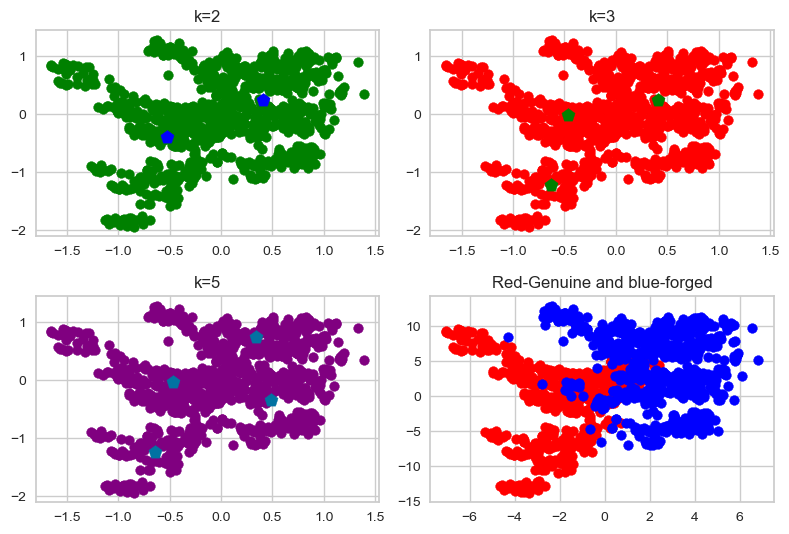

In [25]:

from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(df_train_Kmeans)

np_train_scaled=transformer.transform(df_train_Kmeans)

fig, axs = plt.subplots(2, 2 ) # sharex=True, sharey=True

# K=2
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(np_train_scaled)
etiquetas=kmeans.labels_
clusters= kmeans.cluster_centers_
axs[0, 0].scatter(np_train_scaled[:,0], np_train_scaled[:,1], c="green" )
axs[0, 0].scatter(clusters[:,0], clusters[:,1], s=100, c="blue",  marker=(5,0))
axs[0, 0].set_title("k=2")

# K=3
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(np_train_scaled)
etiquetas=kmeans.labels_
clusters= kmeans.cluster_centers_
axs[0, 1].scatter(np_train_scaled[:,0], np_train_scaled[:,1], c="red")
axs[0, 1].scatter(clusters[:,0], clusters[:,1], s=100, c="green",  marker=(5,0) )   
axs[0, 1].set_title("k=3")

# k=5
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto",max_iter=100).fit(np_train_scaled)
etiquetas=kmeans.labels_
clusters= kmeans.cluster_centers_
axs[1, 0].scatter(np_train_scaled[:,0], np_train_scaled[:,1], c="purple")
axs[1, 0].scatter(clusters[:,0], clusters[:,1], s=100,  marker=(5,0) ) 
axs[1, 0].set_title("k=5")


# original dataset

axs[1, 1].scatter(df_genuino[:,0], df_genuino[:,1], color="red")
axs[1, 1].scatter(df_false[:,0], df_false[:,1], color="blue")
axs[1, 1].set_title("Red-Genuine and blue-forged")

plt.tight_layout()
plt.show()